In [1]:
library(Seurat)
library(ComplexHeatmap)
library(circlize)
library(dplyr)
library(tibble)
library(viridis)
source("./heatmap.fun.R")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘dplyr’


The following objec

In [2]:
load(file = paste0("./load_files/", "Module_continuous_expr_up_E93-110.Rdata"))
##e910_avgs, e910_pmeta, e910_avg_smt, e910_svg_smt, e910_meta_smt

In [3]:
## Reorder org_smt columns, put TC after OC
smt_new_ord <- lapply(c("FC", "MSC", "OC", "TC"), function(x) {
    yy <- colnames(e910_svg_smt)[grepl(paste0("^", x, "\\|"), colnames(e910_svg_smt))]
    return(yy)
    }) %>%
    unlist()
e910_svg_smt <- e910_svg_smt[, smt_new_ord]
e910_meta_smt <- e910_meta_smt[smt_new_ord, ]
unique(e910_meta_smt$region)

[1] "FC"  "MSC" "OC"  "TC"

In [4]:
##----------------------------------------------------------------
## Find region-specific genes (not considering region-shared)
load(file = paste0("./load_files/", "Module_pairwise_pie.dot_up.Rdata"))
##piei, 

fpie <- piei %>%
            filter(Shared == 0) %>%
            group_by(gene) %>%
            mutate(ismax = ifelse(radius == max(radius), 1, 0)) %>%
            ungroup() %>%
            filter(ismax == 1) %>%
            mutate(regsum = FC + MSC + TC + OC)


reg_ord <- c("FC", "MSC", "OC", "TC")
spec_list <- lapply(reg_ord, function(reg) {
    genes <- fpie %>%
                filter(!!sym(reg) == 1) %>%
                filter(regsum == 1) %>%
                .$gene %>% unique()
    return(genes)
    }) %>%
        setNames(., reg_ord)
summary(spec_list)
spec_list

    Length Class  Mode     
FC  144    -none- character
MSC  42    -none- character
OC   66    -none- character
TC   45    -none- character

$FC
  [1] "PENK"         "CAV1"         "NECAB1"       "CBLN2"        "VSTM2L"      
  [6] "NFIA"         "MEIS2"        "PCDH17"       "CPNE8"        "SSTR2"       
 [11] "FSTL5"        "CXXC4"        "TENM3"        "PRSS23"       "PCDH10"      
 [16] "GRM5"         "GRID2"        "LOC707695"    "LSAMP"        "CNTNAP2"     
 [21] "PEG10"        "RPRM"         "CNTN1"        "DPP10"        "FGF7"        
 [26] "PLXNC1"       "IGFBP5"       "KCNJ6"        "SERPINE2"     "NEGR1"       
 [31] "SCG2"         "HTR1B"        "VSTM2B"       "CLSTN1"       "CRYM"        
 [36] "SLN"          "NEUROD1"      "RNF152"       "SV2B"         "GNG4"        
 [41] "SPOCK1"       "B3GAT2"       "CACNA1A"      "POSTN"        "FABP3"       
 [46] "MCUB"         "HS3ST5"       "ZNF827"       "RASSF2"       "PTPRT"       
 [51] "PTCHD4"       "ILDR2"        "CALB2"        "PCDH19"       "NNAT"        
 [56] "KIT"          "KCNV1"        "INTS6L"       "SYNM"         "LOC114671965"
 [61] "FAM189A1"     "SDK2"         "ADAMTSL3"     "FGF9"         "MYO16"       
 [66] "DIRAS2"       "GABRB1"       "GALNT2"       "CA10"         "ELAVL4"      
 [71] "CNTN3"        "ID4"          "PDE1C"        "CACNG3"       "NTN4"        
 [76] "ENOX1"        "NUAK1"        "MASP1"        "GPRIN3"       "MT3"         
 [81] "CELF4"        "NRCAM"        "SLITRK4"      "SLC10A4"      "SLITRK5"     
 [86] "LRRC4C"       "HMGN3"        "LARGE1"       "NPPA"         "ELOVL2"      
 [91] "CYP4X1"       "TM6SF1"       "NEBL"         "JAM2"         "PLXNA1"      
 [96] "PPM1E"        "LOC100427153" "CTNNBL1"      "CNTN4"        "PDE1A"       
[101] "NDST3"        "SPATS2L"      "CNTN6"        "DKK3"         "GRM7"        
[106] "MICU1"        "USP31"        "CEP126"       "FAM81A"       "TSPAN18"     
[111] "PANX1"        "METRNL"       "FAM184A"      "NDRG4"        "NAP1L5"      
[116] "PITPNC1"      "SLC2A13"      "HPCAL4"       "UBE2QL1"      "STX1A"       
[121] "AGAP2"        "GPR12"        "EPHB6"        "TRIM36"       "RIMS1"       
[126] "IDH1"         "WWC2"         "CASD1"        "FGF14"        "SDCBP"       
[131] "LMO4"         "KRT19"        "PALMD"        "LMO3"         "CPE"         
[136] "CDK2AP1"      "PPP2R2B"      "DZIP3"        "BCL11B"       "RBP1"        
[141] "LOC114669724" "GSE1"         "GLUL"         "AK1"         

$MSC
 [1] "NRP2"         "BCL6"         "SLC25A27"     "NRGN"         "OPCML"       
 [6] "CCDC167"      "ETV1"         "ADCYAP1"      "SERTAD4"      "INHBA"       
[11] "ACTN2"        "NWD2"         "ACSL4"        "CCDC71L"      "CHD2"        
[16] "ARL6IP5"      "LDHA"         "TRAF3IP1"     "LOC696005"    "IL33"        
[21] "SFRP1"        "BCAN"         "NDRG2"        "OLFM2"        "PHAX"        
[26] "HIST1H1D"     "FEZ2"         "JUND"         "TTR"          "UBE2Q1"      
[31] "C1QL2"        "AQP4"         "CYSTM1"       "ZFP36L1"      "CEP70"       
[36] "CTNNAL1"      "DNLZ"         "ATP1A2"       "DIRAS3"       "HSCB"        
[41] "LOC107000418" "HIST1H1E"    

$OC
 [1] "EPHA4"        "LOC114679035" "TRIB2"        "EPHB1"        "AKAP12"      
 [6] "TENM2"        "NPY"          "HS3ST1"       "PDZRN4"       "PCP4"        
[11] "SEMA7A"       "FBXO32"       "FRMD4B"       "BTG1"         "SLITRK1"     
[16] "SHB"          "TSHZ1"        "CSRP2"        "PLXNA2"       "FAM49A"      
[21] "NREP"         "NDUFA3"       "ATP5ME"       "ROMO1"        "LOC114671882"
[26] "NEFM"         "TMOD1"        "NLGN1"        "FAM107B"      "NEO1"        
[31] "CAMKV"        "THY1"         "MSRA"         "GALNT10"      "SCHIP1"      
[36] "MAPK10"       "UQCR"         "SLIRP"        "HYPK"         "LOC703365"   
[41] "ELOB"         "NDUFB1"       "NDUFA1"       "TMEM258"      "MYL6"        
[46] "ATP5F1E"      "C5H4orf48"    "SATB2"        "HCFC1R1"      "LOC114671387"
[51] "CCND2"        "NDUFB2"       "ATP5MD"       "UQCRQ"        "CCDC28B"     
[56] "ZNF428"       "NDUFS6"       "PFDN2"        "LOC693820"    "FOS"         
[61] "MEF2C"    

In [5]:
## Impulse fit to get gene orders
timeFile <- paste0("./load_files/", "Module_timing_upper.rds")
if (!file.exists(timeFile)){
    library(URD)
    timeres <- lapply(names(spec_list), function(reg) {
        reg_genes <- spec_list[[reg]]


        submeta <- e910_pmeta[e910_pmeta$lobe == reg, ]
        ptime <- submeta$pseudotime
        expr <- as.matrix(e910_avgs)[reg_genes, rownames(submeta)]

        ## Fit impluse model
        sub_fit <- lapply(reg_genes, function(gg) {
            print(paste0("Working on gene: ", which(reg_genes == gg), " / ", length(reg_genes)))
            ff <- tryCatch(expr = {
                        impulseFit(x = ptime, y = expr[gg, ], k = 20, interpolate = 50)
                    }, 
                    error = function(cond) {
                        impulseFit(x = ptime, y = expr[gg, ], k = 15, interpolate = 50)
                    })
            return(ff)
        }) %>%
            setNames(., reg_genes)
        # Get out onset/offset times  
        timing <- data.frame(
                    time.on=unlist(lapply(sub_fit, function(x) {
                        if (is.list(x)) {
                            return(min(x[['time.on']]))
                        } else{
                            return(x['time.on'])
                        }
                        })),
                    time.off=unlist(lapply(sub_fit, function(x) {
                        if (is.list(x)) {
                            return(max(x[['time.off']]))
                        } else {
                            return(x['time.off'])
                        }
                        })),
                    row.names = reg_genes, 
                    region = reg,
                    stringsAsFactors = FALSE)
        timing[intersect(which(is.na(timing$time.on)), which(is.infinite(timing$time.off))), "time.on"] <- Inf
        timing
        }) %>%
        do.call(rbind, .)

    saveRDS(timeres, file = timeFile)
}

timeres <- readRDS(file = timeFile)

In [6]:
## Genearte gene order based on the impulse fit timing results
order_genes <- split(timeres, timeres$region) %>%
                lapply(., function(x) rownames(x)[order(x$time.on, x$time.off, decreasing = FALSE)]) %>%
                .[c("FC", "MSC", "OC", "TC")]
order_genes %>% sapply(., head, 30)

FC,MSC,OC,TC
ID4,SFRP1,ATP5ME,REV3L
FAM184A,PHAX,UQCR,RAMP1
GSE1,AQP4,NDUFB1,FAM172A
RBP1,LDHA,ATP5F1E,NR2F2
JAM2,BCAN,CCND2,HMGN5
GLUL,C1QL2,LOC109910386,ID2
CDK2AP1,HSCB,SLIRP,PRAG1
HMGN3,CTNNAL1,BTG1,ZNF608
NNAT,DNLZ,FOS,IMPAD1
GPRIN3,CCDC167,MYL6,CBLB


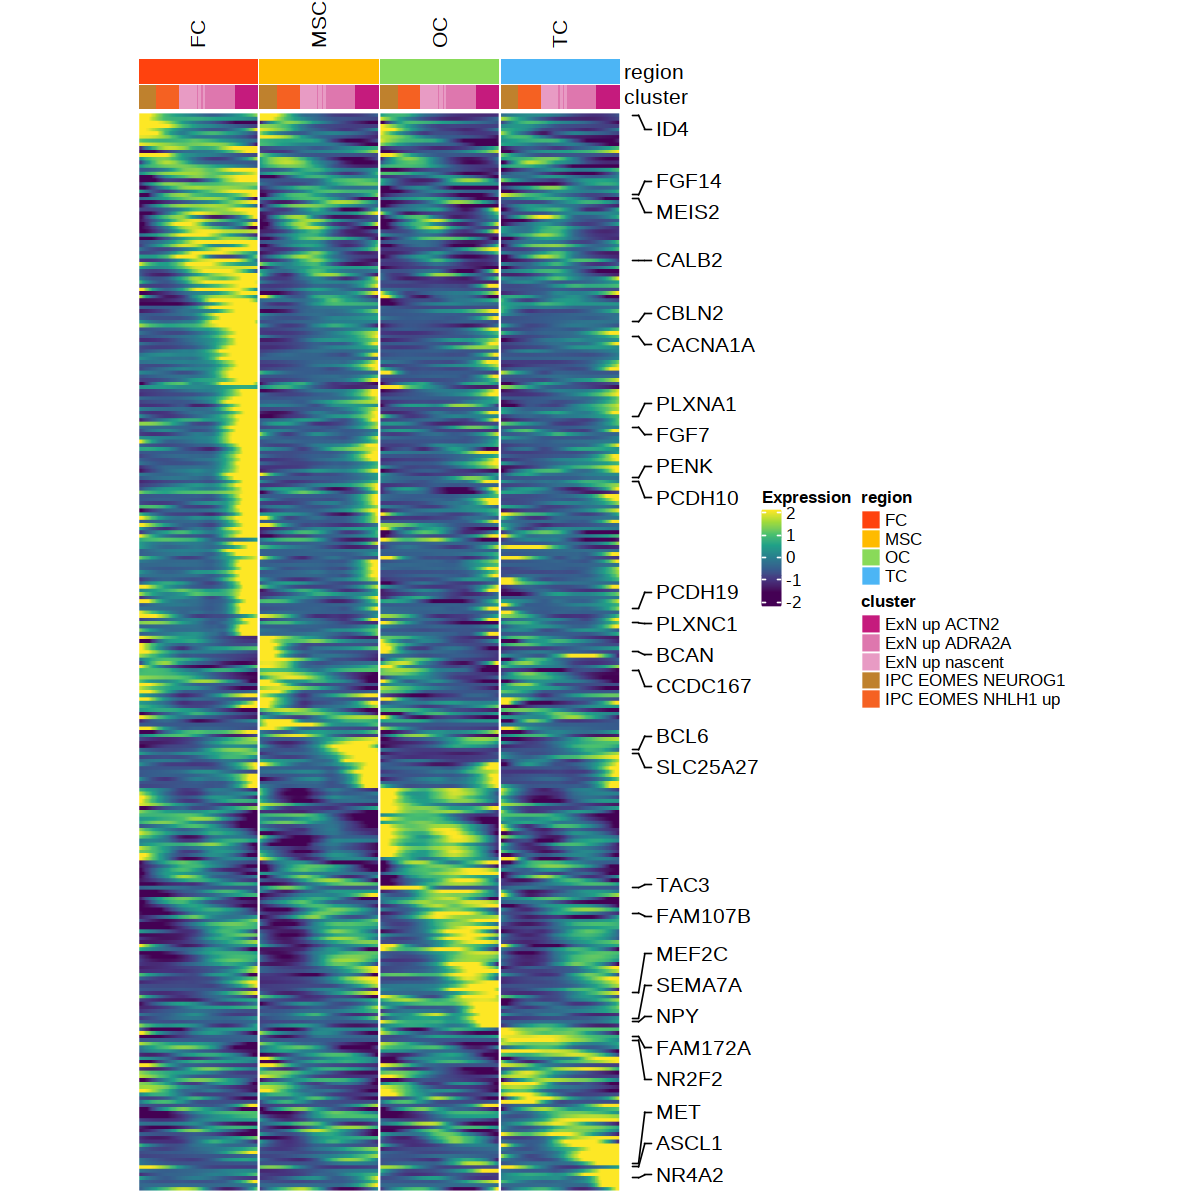

In [7]:
## Visualize based on the gene orders
allpgenes <- unlist(order_genes) %>% unname()
sel_genes <- c("ID4", "FGF14", "PLXNC1", "PCDH19", "CACNA1A", "PCDH8", 
               "NPY1R", "CALB2", "MEIS2", "PCDH10", "PLXNA1", "PENK", 
               "FGF7", "CBLN2", "CYP26A1", "CCDC167", "BCL6", "BCAN", 
               "SLC25A27", "PTN", "NR2F1", "NR4A2", "NR2F1", "NR2F2", 
               "FAM172A", "ASCL1", "MET", "NPY", "MEF2C", "FAM107B", "TAC3", "SEMA7A" ) %>% 
                       unique() %>% 
                       intersect(allpgenes, .)
rsplit <- rep(c("FC", "MSC", "OC", "TC"), sapply(order_genes, length)) %>%
            unlist() %>% unname() %>%
            factor(., levels = c("FC", "MSC", "OC", "TC"))

ht_expr <- plot_heatmap.continuous(mat = e910_svg_smt[allpgenes, ], 
                                   meta = e910_meta_smt, 
                                   label_genes = sel_genes, 
                                   color_breaks = seq(-1.5, 2, 0.5), 
                                   pdf_height = 5, row_split = NULL) ## row_split should be set to rsplit, it will 
                                    ##introduce errors in jupyter notebook
options(repr.plot.width=10, repr.plot.height=10)
draw(ht_expr)

In [8]:
pdf("./report/geneflow_upper.v2.pdf", width = 10, height = 5)
ht_expr <- plot_heatmap.continuous(mat = e910_svg_smt[allpgenes, ], 
                                   meta = e910_meta_smt, 
                                   label_genes = sel_genes, 
                                   color_breaks = seq(-1.5, 2, 0.5), 
                                   pdf_height = 5, row_split = rsplit)
draw(ht_expr)
dev.off()

png 
  2

In [9]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scatterpie_0.1.5      foreach_1.5.0         ggpubr_0.3.0         
 [4] ggplot2_3.3.0         GetoptLong_0.1.8      WGCNA_1.69           
 [7] fastcluster_1.1.25    dynamicTreeCut_1.63-1 viridis_0.5.1        
[10] viridisLite_0.3.0  